<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/Talleres/taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

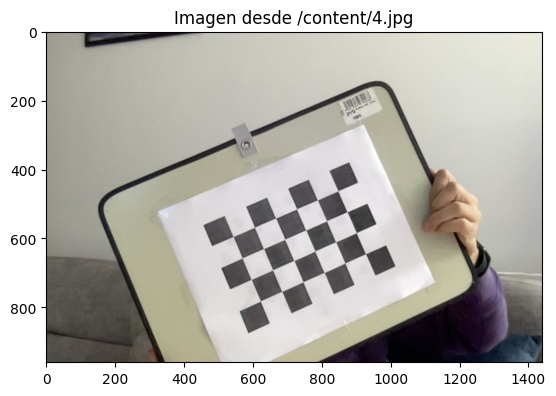

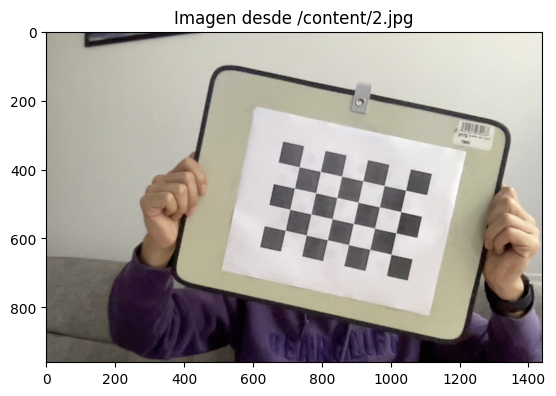

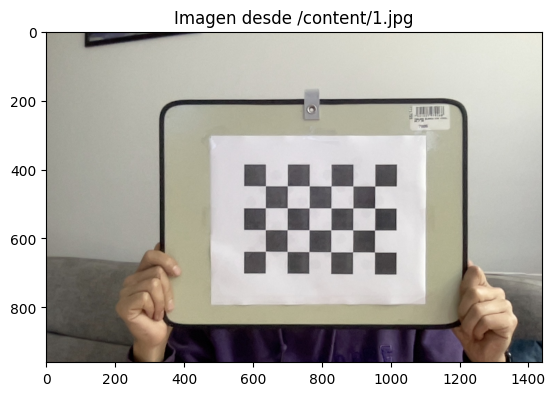

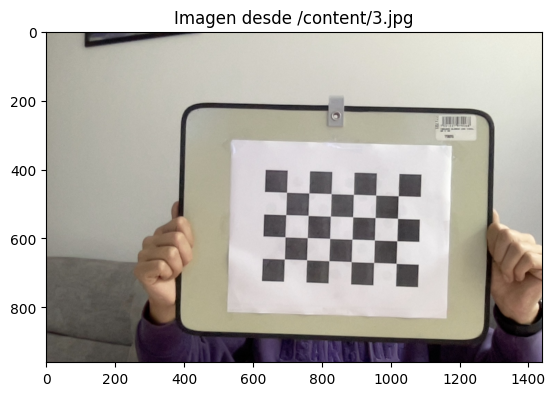

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Lista de rutas de las imágenes
imagen_paths = [f'/content/{i}.jpg' for i in range(1, 23)]  # Asumiendo que tus imágenes están enumeradas de 1 a 25.

# Seleccionar 4 imágenes al azar
rutas_aleatorias = random.sample(imagen_paths, 4)

for ruta in rutas_aleatorias:
    imagen = cv2.imread(ruta)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen desde {ruta}')
    plt.show()

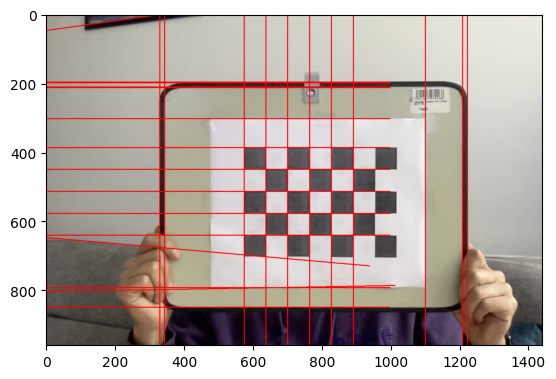

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Establecer los puntos objeto para una esquina del damero, suponiendo que cada cuadro tiene tamaño 1x1 (puedes ajustar esto según tu damero)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

# Listas para almacenar todos los puntos objeto e imagen de todas las imágenes
objpoints = [] # Puntos 3D en el mundo real
imgpoints = [] # Puntos 2D en la imagen

def detectar_damero_hough(imagen):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Suavizar la imagen para reducir ruido
    gris_suave = cv2.GaussianBlur(gris, (5, 5), 0)

    # Detectar bordes usando Canny
    bordes = cv2.Canny(gris_suave, 50, 150)

    # Detectar líneas usando la Transformada de Hough
    líneas = cv2.HoughLines(bordes, 1, np.pi / 180, 150)

    if líneas is not None:
        for rho, theta in líneas[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(imagen, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Intentar detectar esquinas del damero
    ret, esquinas = cv2.findChessboardCorners(gris, (7, 7))

    if ret:  # Si se encontraron esquinas
        cv2.drawChessboardCorners(imagen, (7, 7), esquinas, ret)
        objpoints.append(objp)
        imgpoints.append(esquinas)

        # Calibrar la cámara
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gris.shape[::-1], None, None)

        # Corrección de distorsión en una imagen
        imagen = cv2.undistort(imagen, mtx, dist, None, mtx)

    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.show()

imagen = cv2.imread("/content/1.jpg")
detectar_damero_hough(imagen)

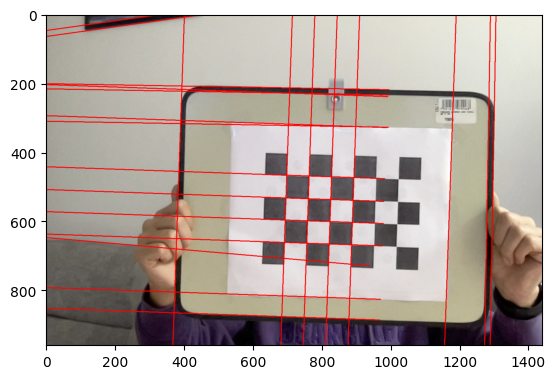

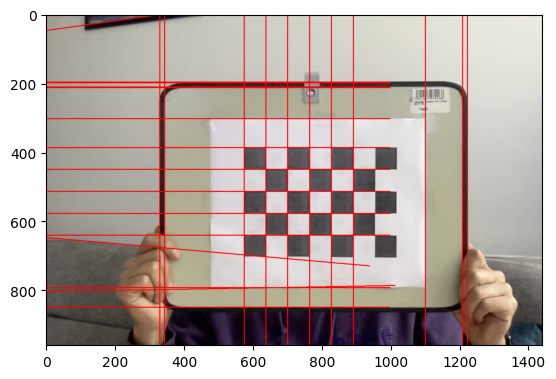

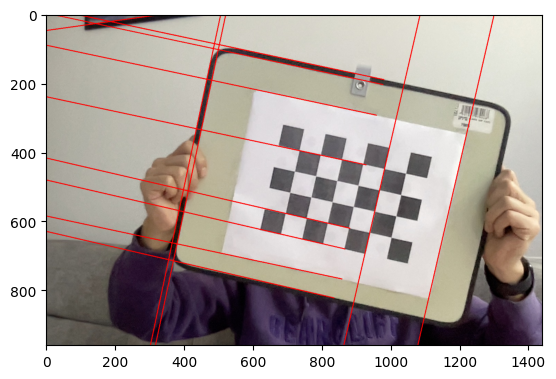

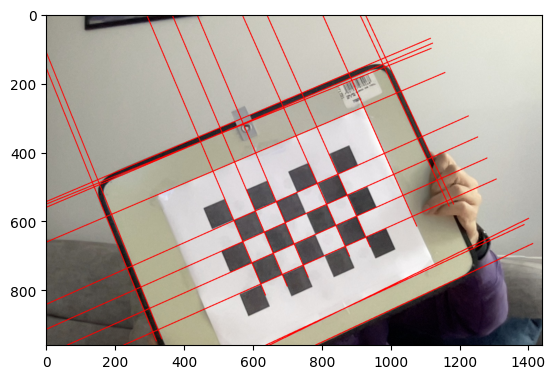

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Establecer los puntos objeto para una esquina del damero, suponiendo que cada cuadro tiene tamaño 1x1 (puedes ajustar esto según tu damero)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

# Listas para almacenar todos los puntos objeto e imagen de todas las imágenes
objpoints = [] # Puntos 3D en el mundo real
imgpoints = [] # Puntos 2D en la imagen

def detectar_damero_hough(imagen):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Suavizar la imagen para reducir ruido
    gris_suave = cv2.GaussianBlur(gris, (5, 5), 0)

    # Detectar bordes usando Canny
    bordes = cv2.Canny(gris_suave, 50, 150)

    # Detectar líneas usando la Transformada de Hough
    líneas = cv2.HoughLines(bordes, 1, np.pi / 180, 150)

    if líneas is not None:
        for rho, theta in líneas[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(imagen, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Intentar detectar esquinas del damero
    ret, esquinas = cv2.findChessboardCorners(gris, (7, 7))

    if ret:  # Si se encontraron esquinas
        cv2.drawChessboardCorners(imagen, (7, 7), esquinas, ret)
        objpoints.append(objp)
        imgpoints.append(esquinas)

        # Calibrar la cámara
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gris.shape[::-1], None, None)

        # Corrección de distorsión en una imagen
        imagen = cv2.undistort(imagen, mtx, dist, None, mtx)

    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.show()

# Lista de rutas de las imágenes
imagen_paths = [f'/content/{i}.jpg' for i in range(1, 23)]  # Asumiendo que tus imágenes están enumeradas de 1 a 4.

# Seleccionar 4 imágenes al azar
rutas_aleatorias = random.sample(imagen_paths, 4)

for ruta in rutas_aleatorias:
    imagen = cv2.imread(ruta)
    detectar_damero_hough(imagen)

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Establecer los puntos objeto para una esquina del damero, suponiendo que cada cuadro tiene tamaño 1x1 (puedes ajustar esto según tu damero)
objp = np.zeros((6*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:6].T.reshape(-1,2)

# Listas para almacenar todos los puntos objeto e imagen de todas las imágenes
objpoints = [] # Puntos 3D en el mundo real
imgpoints = [] # Puntos 2D en la imagen

def detectar_damero(imagen):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Intentar detectar esquinas del damero
    ret, esquinas = cv2.findChessboardCorners(gris, (6, 6))

    # Refinamiento de esquinas
    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        esquinas2 = cv2.cornerSubPix(gris, esquinas, (11, 11), (-1, -1), criteria)
        objpoints.append(objp)
        imgpoints.append(esquinas2)

        # Dibuja las esquinas detectadas para verificación visual
        imagen_con_esquinas = cv2.drawChessboardCorners(imagen, (6,6), esquinas2, ret)
        plt.imshow(imagen_con_esquinas)
        plt.show()
    else:
        print("No se detectaron esquinas en la imagen.")


# Lista de rutas de las imágenes
imagen_paths = [f'/content/{i}.jpg' for i in range(1, 24)]  # Imágenes enumeradas de 1 a 23.

for ruta in imagen_paths:
    imagen = cv2.imread(ruta)
    detectar_damero(imagen)

# Usar la última imagen leída para obtener su tamaño en escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Calibrar la cámara
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gris.shape[::-1], None, None)

No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.
No se detectaron esquinas en la imagen.


error: ignored

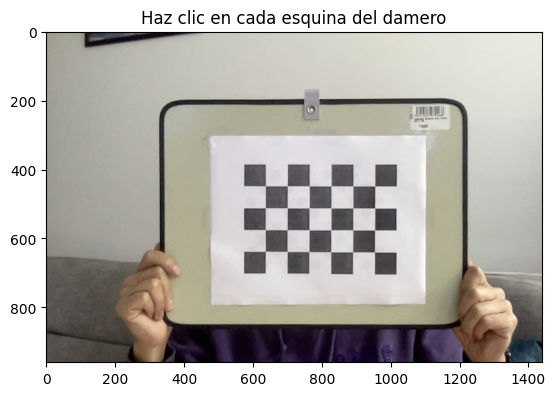

Haz clic en cada esquina del damero de la imagen /content/1.jpg, comenzando desde la esquina superior izquierda y avanzando por filas.


KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def marcar_esquinas_manualmente(imagen_path):
    # Cargar y mostrar la imagen
    imagen = cv2.imread(imagen_path)

    # Verificar si la imagen fue cargada correctamente
    if imagen is None:
        raise ValueError(f"La imagen en {imagen_path} no pudo ser cargada.")

    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen
    plt.imshow(imagen_rgb)
    plt.title('Haz clic en cada esquina del damero')

    # Mostrar explícitamente
    plt.show()

    # Obtener puntos manualmente (por ejemplo, 49 puntos para un damero 7x7)
    print(f"Haz clic en cada esquina del damero de la imagen {imagen_path}, comenzando desde la esquina superior izquierda y avanzando por filas.")
    puntos = plt.ginput(n=49, timeout=0, show_clicks=True)  # n es el número de esquinas
    plt.close()

    return puntos

# Lista de rutas a las imágenes
imagen_paths = [f"/content/{i}.jpg" for i in range(1, 24)]  # Modifica "tu_ruta" con la ruta correcta

todos_los_puntos = []
for imagen_path in imagen_paths:
    puntos_img = marcar_esquinas_manualmente(imagen_path)
    todos_los_puntos.append(puntos_img)

# Aquí, "todos_los_puntos" contendrá los puntos marcados de las 23 imágenes.
# Luego puedes procesarlos como lo necesites para la calibración.
